# Fase 5: Simulación de Monte Carlo

Resolver el problema clásico de Merton usando simulaciones de Monte Carlo. Para
esto, usando los parámetros S(0) = 112, K = 115, r = 0,08, σ = 0,18 y T = 1 deberán:

In [1]:
#Importo mis librerías
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import Funciones

In [3]:
S0 = 112      # Precio inicial del activo
K = 115       # Precio de ejercicio
r = 0.08      # Tasa libre de riesgo
sigma = 0.18  # Volatilidad
T = 1         # Tiempo a vencimiento (en años)
N = 252       # Número de pasos de tiempo (1 año con pasos diarios laborales)
n_paths = 10000  # Número de trayectorias

## Simular trayectorias de precio del activo

Simular trayectorias de precio del activo usando movimientos brownianos, en un
mundo riesgo neutral.

In [4]:
# Simular trayectorias en mundo riesgo-neutral (mu = r)
t, paths = Funciones.simulate_gbm(S0, r, sigma, T, N, n_paths)

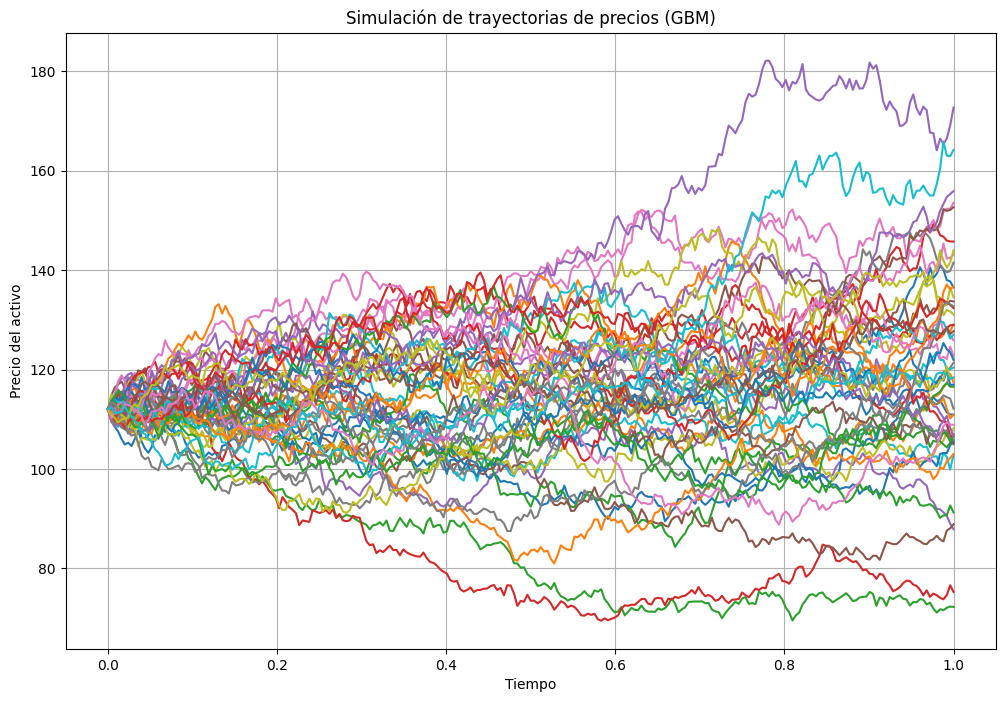

In [11]:
# Graficar algunas trayectorias simuladas
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.plot(t, paths[i])
plt.title("Simulación de trayectorias de precios (GBM)")
plt.xlabel("Tiempo")
plt.ylabel("Precio del activo")
plt.grid(True)
plt.show()

## Calcular el valor PUT y comparar

Calcular el valor de una opción PUT europea por el método de Monte-Carlo y
comparar resultados con la solución obtenida por la fórmula de Black-Scholes.

In [13]:
# Extraer precios terminales
ST = paths[:, -1]

# Calcular el valor de la opción PUT por Monte Carlo
put_mc=Funciones.valor_put(ST, K, T,r)

print(f"Precio estimado de la opción PUT (Monte Carlo): {put_mc:.4f}")

Precio estimado de la opción PUT (Monte Carlo): 5.3461


In [14]:
# Comparación con fórmula de Black-Scholes
put_bs= Funciones.black_scholes_put(S0, K, T, r, sigma)
print(f"Precio de la opción PUT (Black-Scholes): {put_bs:.4f}")

Precio de la opción PUT (Black-Scholes): 5.2444


In [16]:
#Hacemos la comparación de los precios
error_absoluto = abs(put_mc - put_bs)
error_relativo = error_absoluto / put_bs * 100

print(f"Error absoluto: {error_absoluto:.4f}")
print(f"Error relativo: {error_relativo:.2f}%")

Error absoluto: 0.1017
Error relativo: 1.94%


## Calcular el valor de una opción Binaria

Calcular el valor de una opción Binaria por el método de Monte-Carlo.

In [17]:
#Calculamos la opción binaria
precio_binario = Funciones.binaria_montecarlo(ST, K, T, r)

print(f"Valor de la opción binaria (put) por Monte Carlo: {precio_binario:.4f}")

Valor de la opción binaria (put) por Monte Carlo: 0.3898


## Calcular el error

En ambos casos, calcular el error en términos del numero de iteraciones de Monte-
Carlo